# 1. get cell embedding

## read h5ad file

In [35]:
import scanpy as sc

# adata = sc.read_h5ad("data/trajectory/trajectory_seurat_filtered.h5ad")
adata = sc.read_h5ad("/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/data/zero-shot/bone_marrow/bone_marrow.h5ad")
adata

AnnData object with n_obs × n_vars = 8978 × 36398
    obs: 'cell.labels', 'lanes', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'antibody.X', 'antibody_features', 'antibody_raw.X', 'citation', 'default_embedding', 'rank_genes_groups', 'rank_genes_groups_filtered', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_umap'

In [38]:
adata.var_names = adata.var['feature_name']
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/anndata/_core/anndata.py:956: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['MIR1302-2HG', 'FAM138A', 'OR4F5', 'ENSG00000238009.6', 'ENSG00000239945.1']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [52]:

sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
# sc.tl.umap(adata)
# sc.tl.umap(adata, min_dist=0.4, spread=3)

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


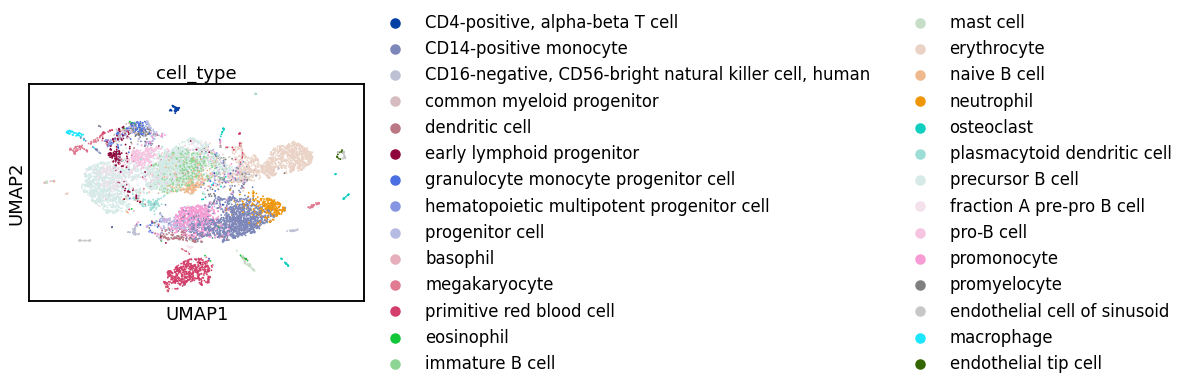

In [53]:
sc.tl.umap(adata, min_dist=0.6, spread=1.5)
sc.pl.umap(adata, color = ['cell_type'])
# sc.pl.umap(adata, color = ['cell_type'],legend_loc = 'on data', legend_fontsize = 'xx-small', edges = True)


/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


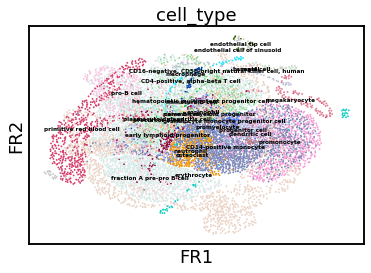

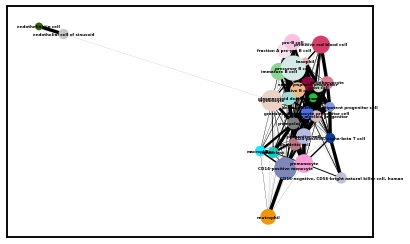

In [54]:
# use the umap to initialize the graph layout.
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_diffmap")
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color='cell_type', legend_loc='on data', legend_fontsize = 'xx-small')
sc.tl.paga(adata, groups='cell_type')
sc.pl.paga(adata, color='cell_type', edge_width_scale = 0.3, fontsize = 4)

In [58]:
import numpy as np


adata.uns["iroot"] = np.flatnonzero(adata.obs["cell_type"] == "precursor B cell")[0]
sc.tl.dpt(adata)

In [59]:
adata

AnnData object with n_obs × n_vars = 8978 × 2000
    obs: 'cell.labels', 'lanes', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'dpt_pseudotime'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'antibody.X', 'antibody_features', 'antibody_raw.X', 'citation', 'default_embedding', 'rank_genes_groups', 'rank_genes_groups_filtered', 'schema_reference', 'schema_version', 'title', 'hvg', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'draw_gra

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


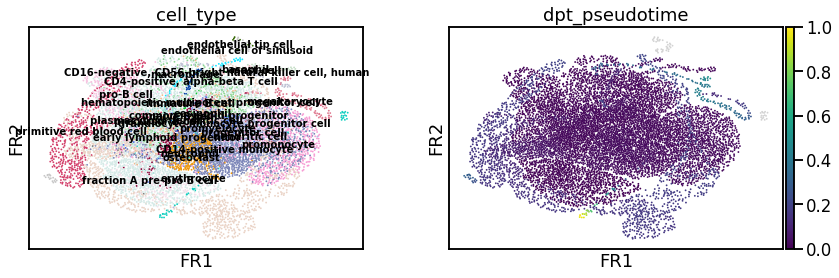

In [60]:
sc.pl.draw_graph(adata, color=["cell_type", "dpt_pseudotime"], legend_loc="on data")

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


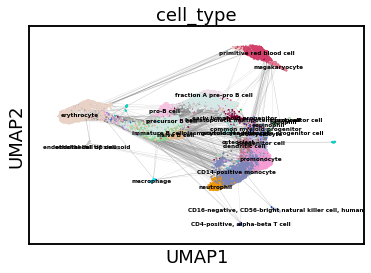

In [15]:
sc.pp.neighbors(adata, n_neighbors=5, n_pcs = 30)
sc.pl.umap(adata, edges=True, color = 'cell_type', legend_loc= 'on data', legend_fontsize= 'xx-small')

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


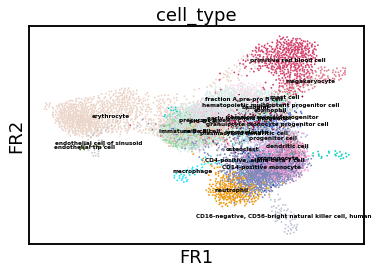

In [16]:
sc.tl.draw_graph(adata, init_pos='X_umap')
sc.pl.draw_graph(adata, color='cell_type', legend_loc='on data', legend_fontsize = 'xx-small')

In [22]:
import pandas as pd
import numpy as np

labels = np.unique()
label_map = {}
adata.obs['cluster'] = adata.obs['cell_type'].astype(pd.Category).cat.codes

AttributeError: module 'pandas' has no attribute 'Category'

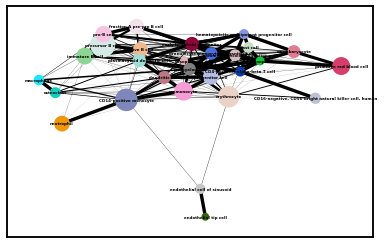

In [25]:
sc.tl.paga(adata, groups='cell_type')
sc.pl.paga(adata, edge_width_scale = 0.3, fontsize = 4)

In [26]:
sc.tl.draw_graph(adata, init_pos='paga')

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


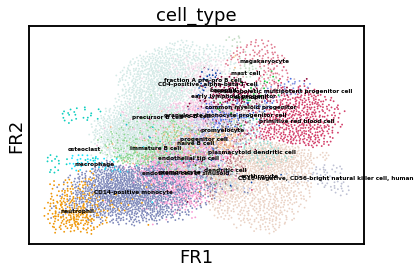

In [27]:
sc.pl.draw_graph(adata, color=['cell_type'], legend_loc='on data', legend_fontsize=  'xx-small')

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


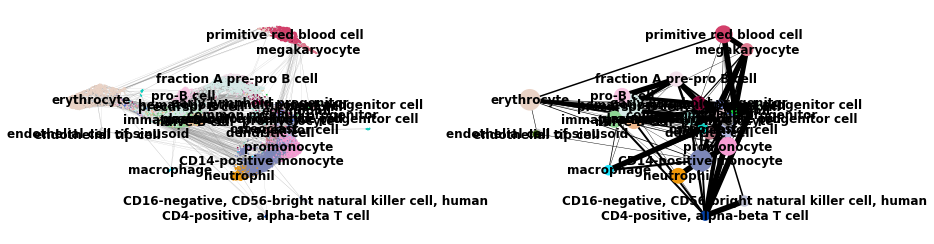

In [28]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True)

In [31]:
adata.X.min()

0.0

## scgpt

In [29]:
from biollm.utils.utils import load_config
from biollm.base.load_scgpt import LoadScgpt
import os
import scanpy as sc


config_file = './configs/scgpt_cell_emb.toml'
configs = load_config(config_file)

obj = LoadScgpt(configs)
file_name = os.path.basename(configs.input_file)
obj.model = obj.model.to(configs.device)
emb = obj.get_embedding(obj.args.emb_type, adata=adata)
print('embedding shape:', emb.shape)
adata.obsm['scgpt_cell_emb'] = emb 


{'ntoken': 60697, 'd_model': 512, 'nhead': 8, 'd_hid': 512, 'nlayers': 12, 'nlayers_cls': 3, 'n_cls': 1, 'dropout': 0.2, 'pad_token': '<pad>', 'do_mvc': False, 'do_dab': False, 'use_batch_labels': False, 'num_batch_labels': None, 'domain_spec_batchnorm': False, 'input_emb_style': 'continuous', 'cell_emb_style': 'cls', 'mvc_decoder_style': 'inner product', 'ecs_threshold': 0.3, 'explicit_zero_prob': False, 'fast_transformer_backend': 'flash', 'pre_norm': False, 'vocab': GeneVocab(), 'pad_value': -2, 'n_input_bins': 51, 'use_fast_transformer': True}


2024-08-14 15:18:07-load_llm[line-50]-INFO: Loading params encoder.embedding.weight with shape torch.Size([60697, 512])
2024-08-14 15:18:07-load_llm[line-50]-INFO: Loading params encoder.enc_norm.weight with shape torch.Size([512])
2024-08-14 15:18:07-load_llm[line-50]-INFO: Loading params encoder.enc_norm.bias with shape torch.Size([512])
2024-08-14 15:18:07-load_llm[line-50]-INFO: Loading params value_encoder.linear1.weight with shape torch.Size([512, 1])
2024-08-14 15:18:07-load_llm[line-50]-INFO: Loading params value_encoder.linear1.bias with shape torch.Size([512])
2024-08-14 15:18:07-load_llm[line-50]-INFO: Loading params value_encoder.linear2.weight with shape torch.Size([512, 512])
2024-08-14 15:18:07-load_llm[line-50]-INFO: Loading params value_encoder.linear2.bias with shape torch.Size([512])
2024-08-14 15:18:07-load_llm[line-50]-INFO: Loading params value_encoder.norm.weight with shape torch.Size([512])
2024-08-14 15:18:07-load_llm[line-50]-INFO: Loading params value_encoder

scGPT - INFO - Binning data ...
(8978, 2138)


2024-08-14 15:18:12-load_scgpt[line-183]-INFO: get dataloader Done!
Cell embedding: 100%|██████████| 1123/1123 [00:21<00:00, 51.17it/s]
2024-08-14 15:18:34-load_scgpt[line-209]-INFO: get cell embedding Done!


embedding shape: (8978, 512)


/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


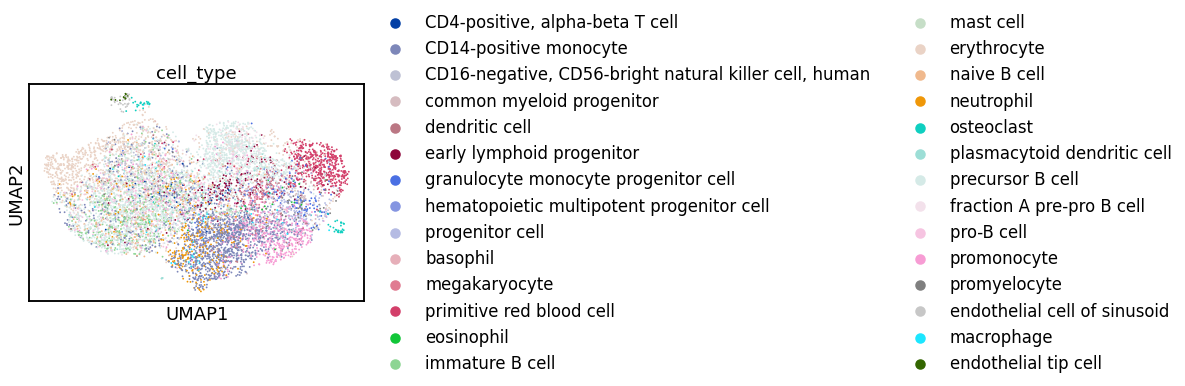

In [30]:
sc.pp.neighbors(adata, use_rep='scgpt_cell_emb', n_neighbors=5, n_pcs = 30)
sc.tl.umap(adata)
sc.pl.umap(adata, color='cell_type')
sc.tl.draw_graph(adata)

/home/share/huadjyin/home/s_qiuping1/app/miniconda3/envs/scgpt/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


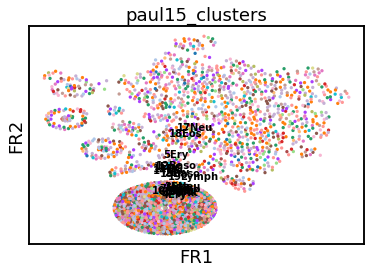

In [8]:
sc.pl.draw_graph(adata, color="cell_type", legend_loc="on data")

## scBert